# Lattice charts as a reporting tool

Sometimes, you need to see a bunch of charts to compare how things have changed across a bunch of stuff. As a reporting tool, lattice charts are great at helping you spot news -- "What is going on THERE?" They're also great for giving you a flavor for how a trend is affecting smaller areas. 

So we're going to use our favorite dataset -- campus parking tickets -- and see what's happening lot to lot over the years we have data. So we start with our usual. 

In [16]:
import agate

import warnings
warnings.filterwarnings('ignore')

In [17]:
tickets = agate.Table.from_csv('../../Data/tickets.csv')

In [18]:
print(tickets)

| column    | data_type |
| --------- | --------- |
| Citation  | Text      |
| Date      | DateTime  |
| Location  | Text      |
| Violation | Text      |



Now we need to add years as a field.

In [19]:
tickets_with_years = tickets.compute([
    ('year', agate.Formula(agate.Number(), lambda row: '%s' % row['Date'].year))
])

This next step groups the tickets by Location, but only includes Locations with more than 3000 tickets at that location. This will give me just a list of the largest lots.

In [30]:
top_lots = tickets_with_years.group_by('Location').having([
    ('count', agate.Count())
], lambda t: t['count'] > 3000)

Now we'll group it by year and count those up. So tickets by year. 

In [31]:
by_year = top_lots.group_by('year')

In [32]:
counts = by_year.aggregate([
    ('count', agate.Count())
])

Now we'll group those tickets by year into lots. 

In [33]:
by_lot = counts.group_by('Location')

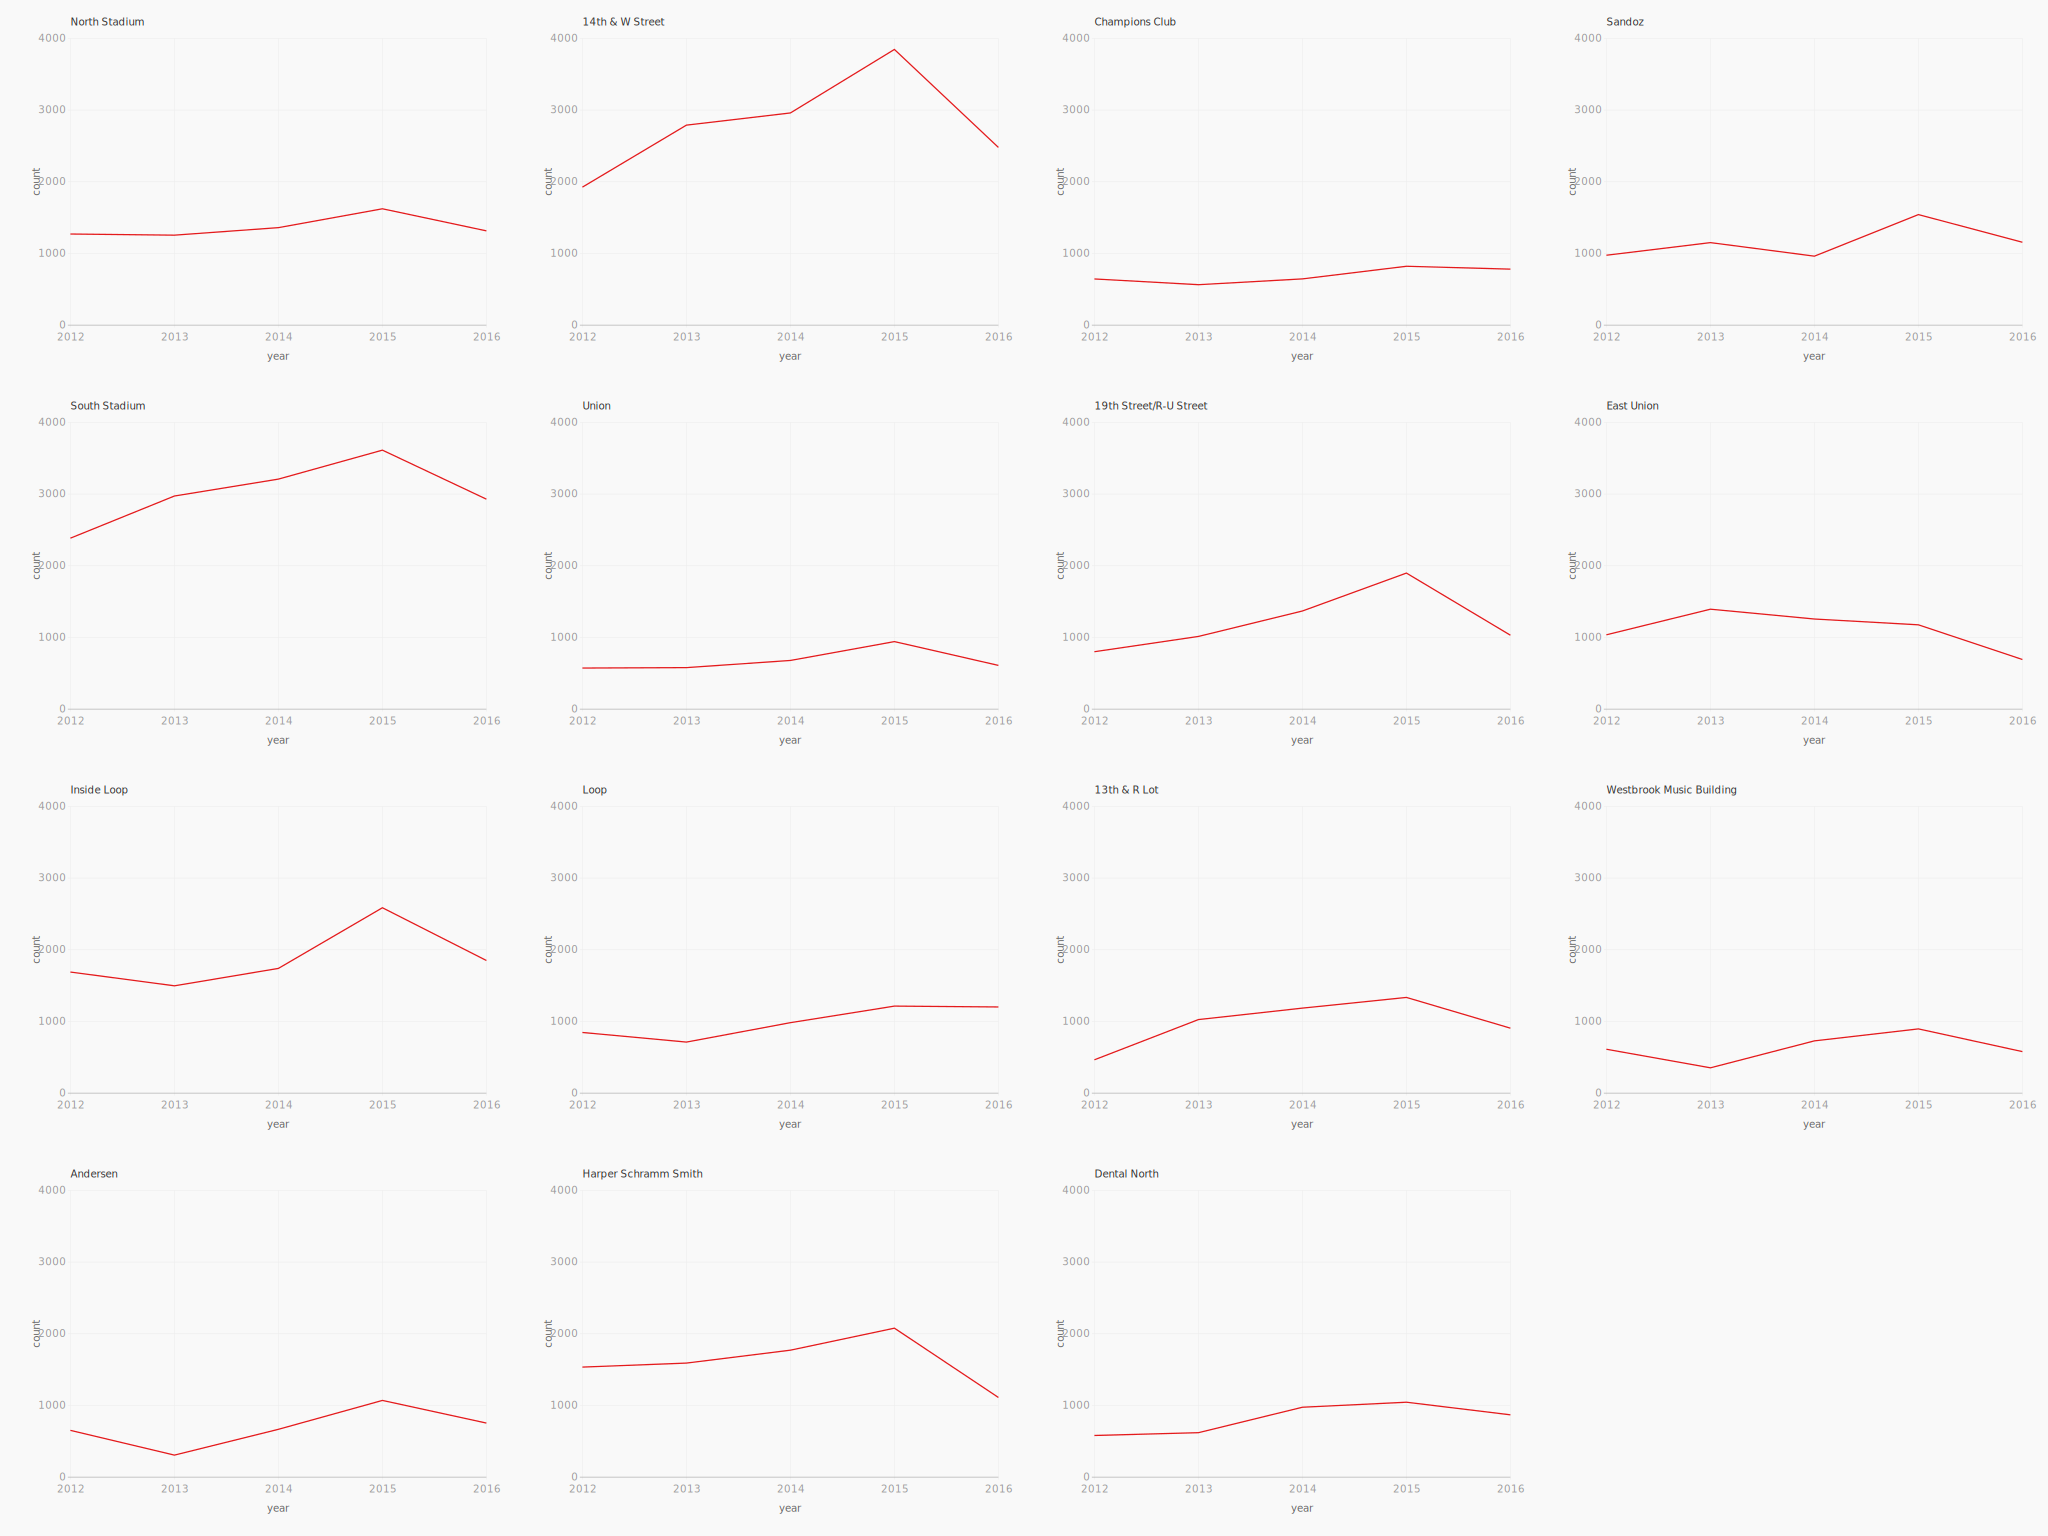

In [34]:
by_lot.order_by('year').line_chart('year', 'count')

So what do we see here? 

Honestly, nothing much. We have some drops in some of the bigger lots, but we also have some missing data in 2016. So is it a drop or is it missing data. Seems a big meh to me. 

### Assignment

Using the LPD arrests data from last time, create a lattice chart of arrests by race by year. 